In [59]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

scenario = ['PAK', 'RUS', 'HOA', 'URU', 'ALL']

df = [ pd.read_csv(scenario[i] + '-highestLosses.csv') for i in range(len(scenario)) ]

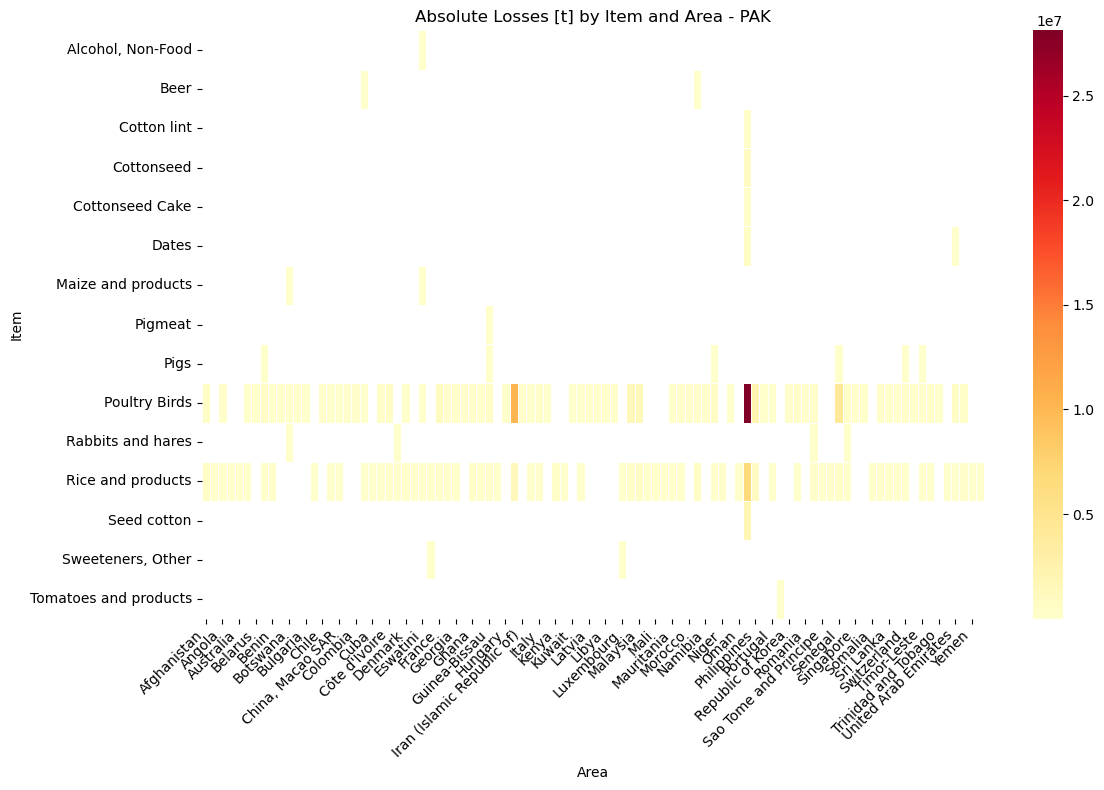

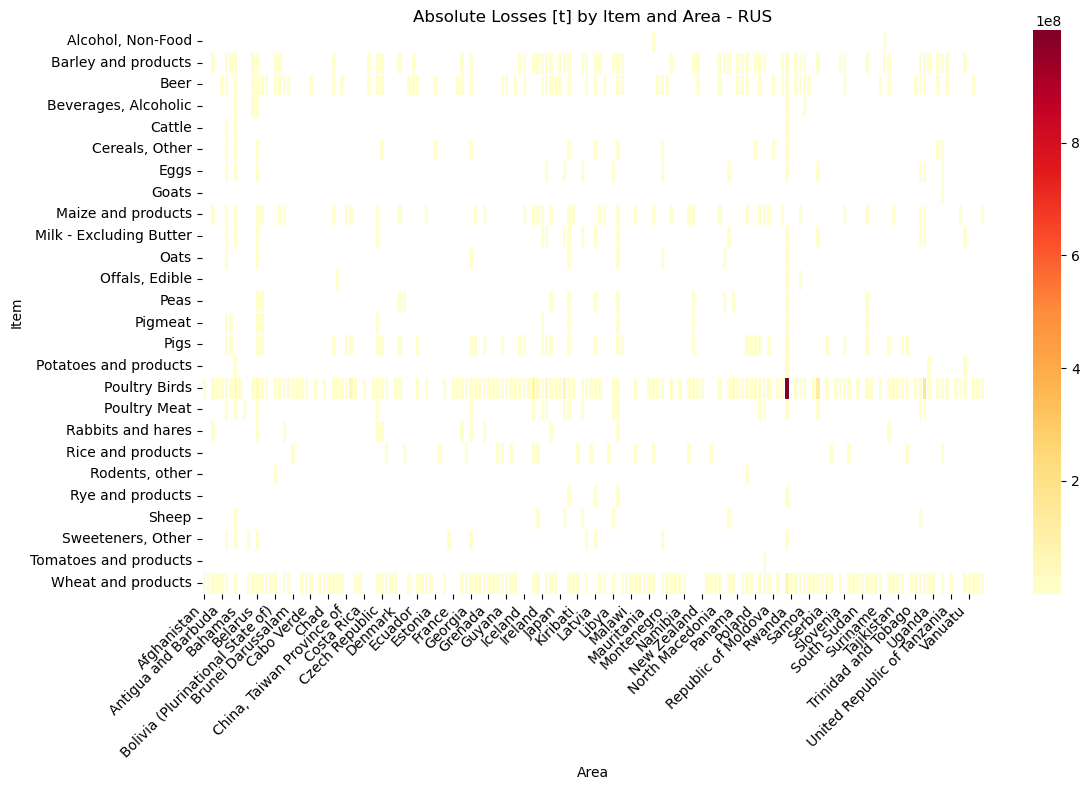

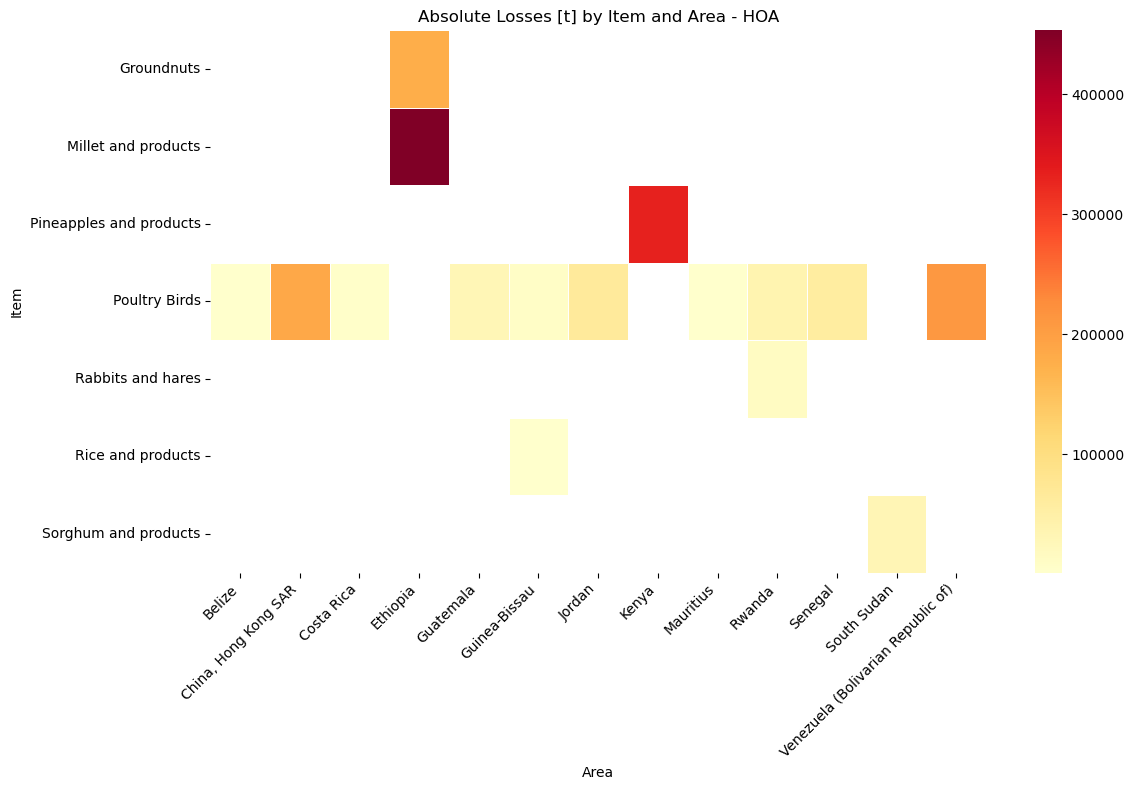

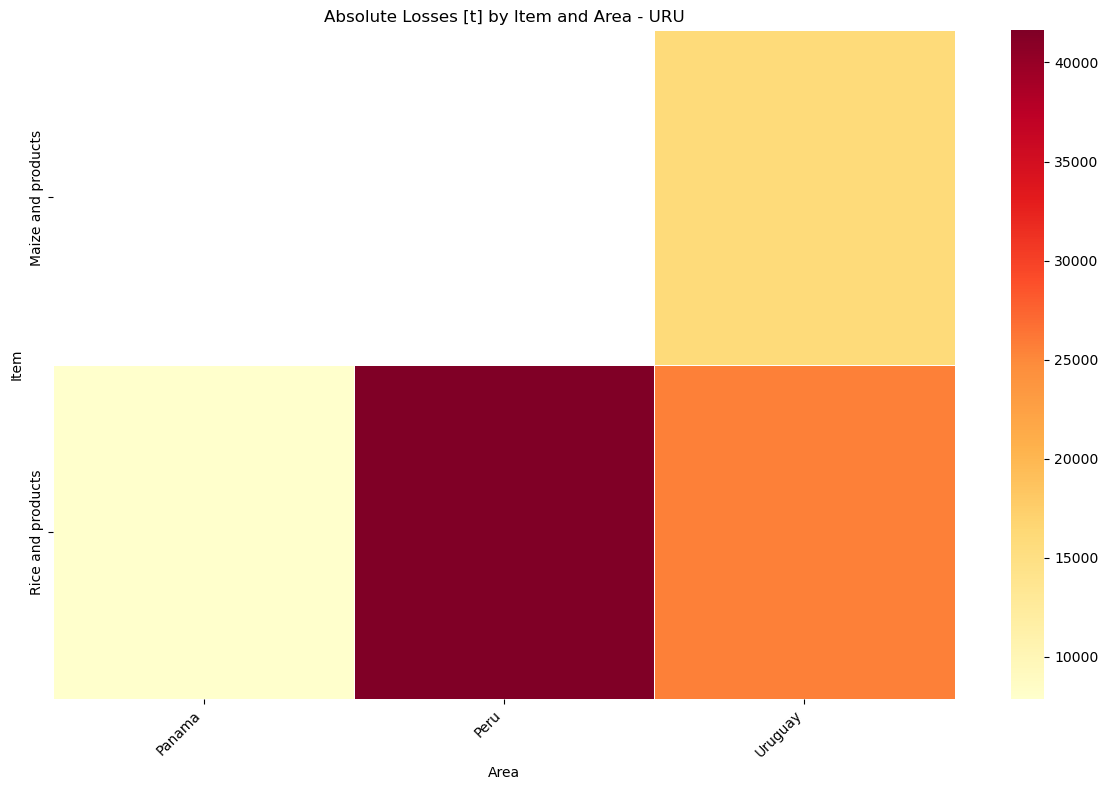

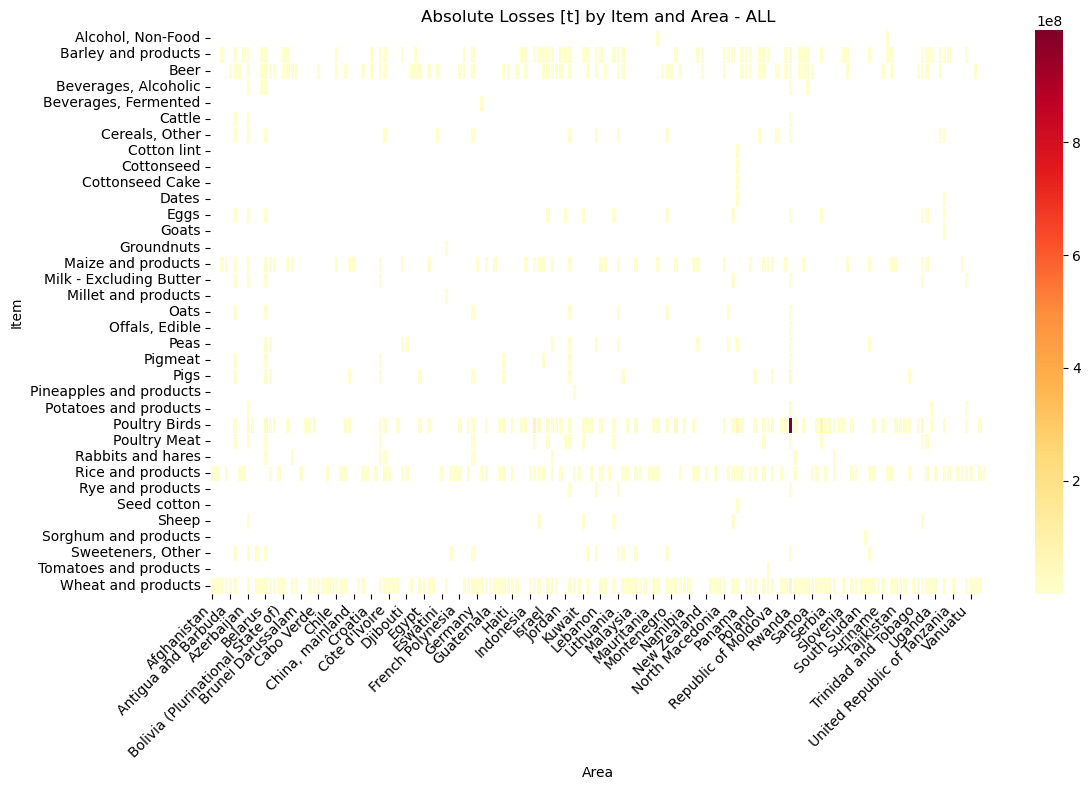

In [60]:
for i in range (len(scenario)):
    pivot_table = df[i].pivot_table(
    index='item',
    columns='area',
    values='absolute_losses [t]',
    aggfunc='sum',
    fill_value=0
    )

    # Replace zeros with NaN
    masked_data = pivot_table.replace(0, np.nan)
    cmap = sns.color_palette("YlOrRd", as_cmap=True)
    cmap.set_bad(color='white')

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
    plt.title("Absolute Losses [t] by Item and Area - " + scenario[i])
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

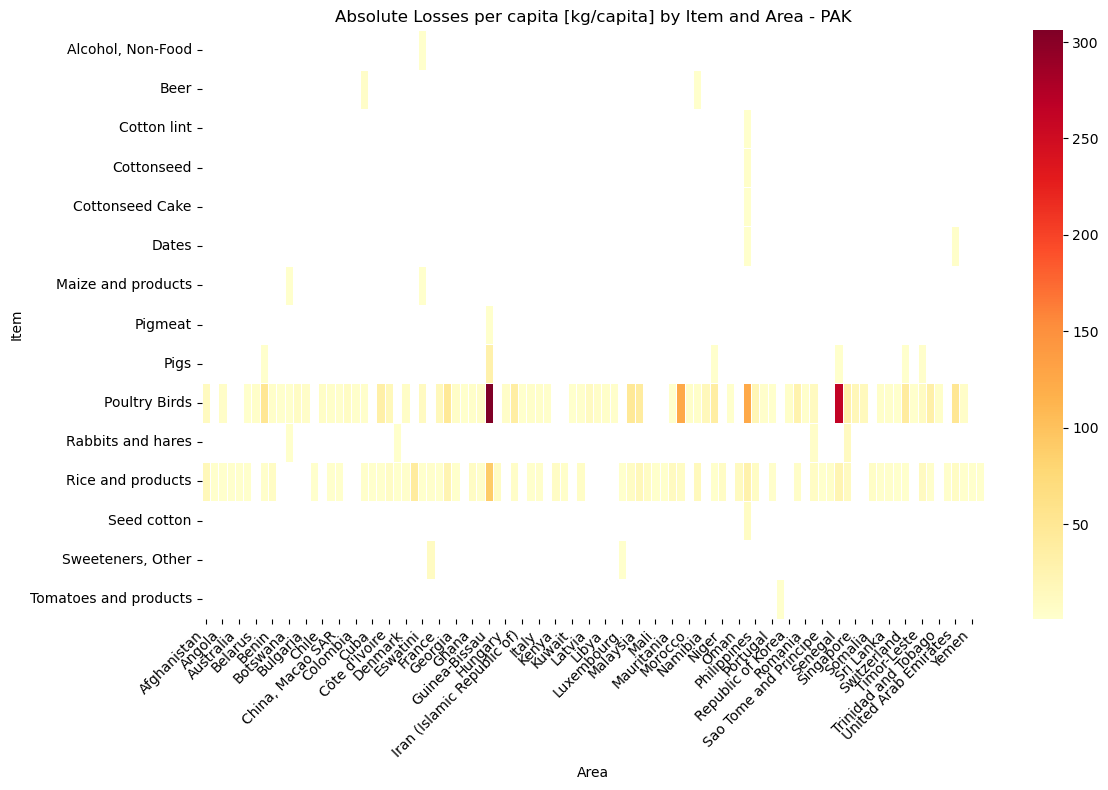

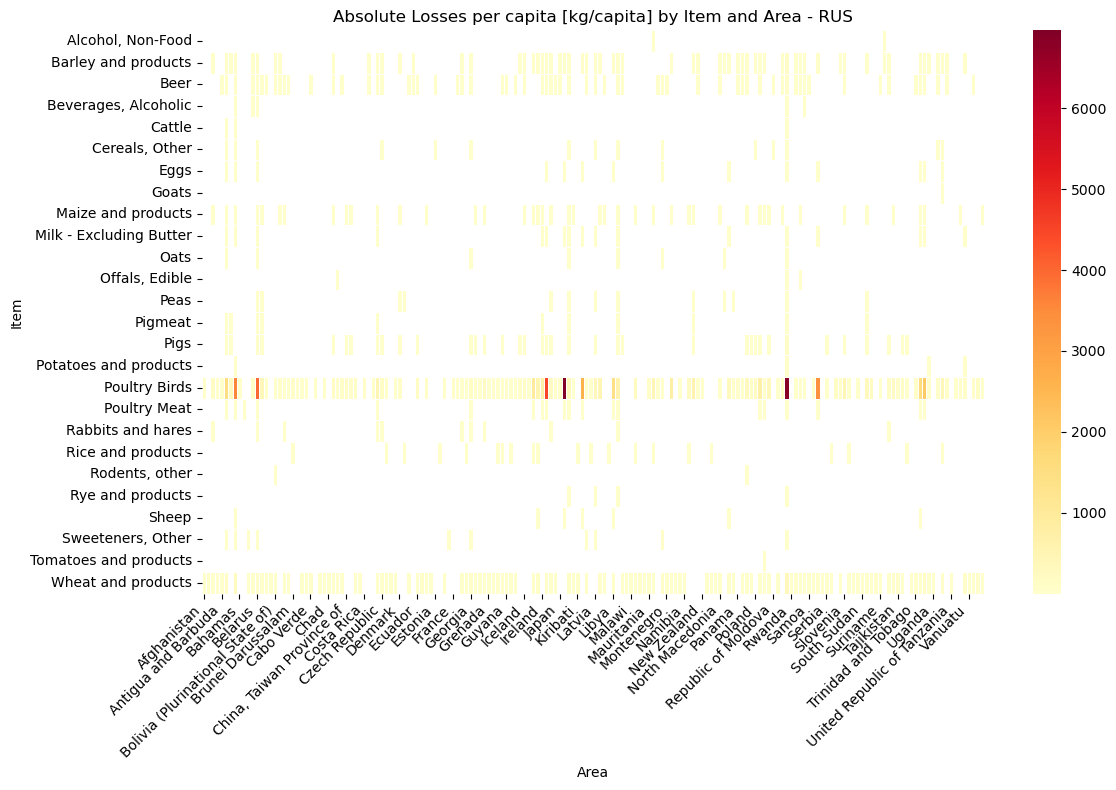

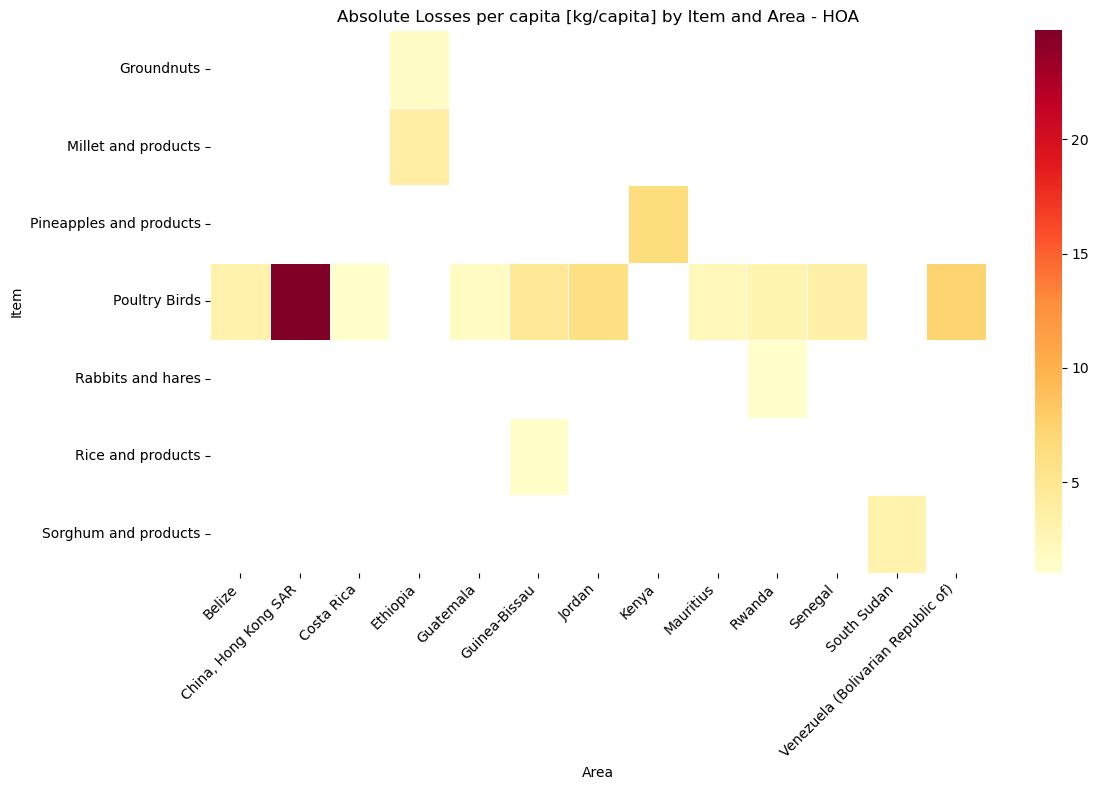

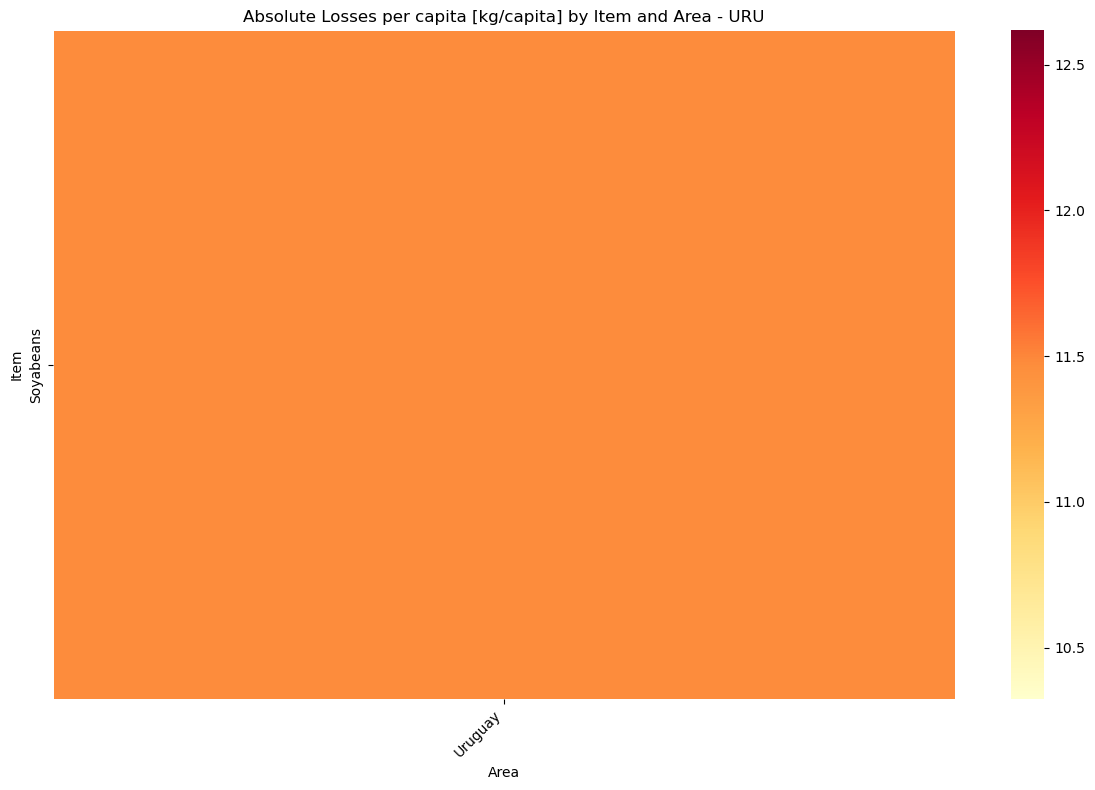

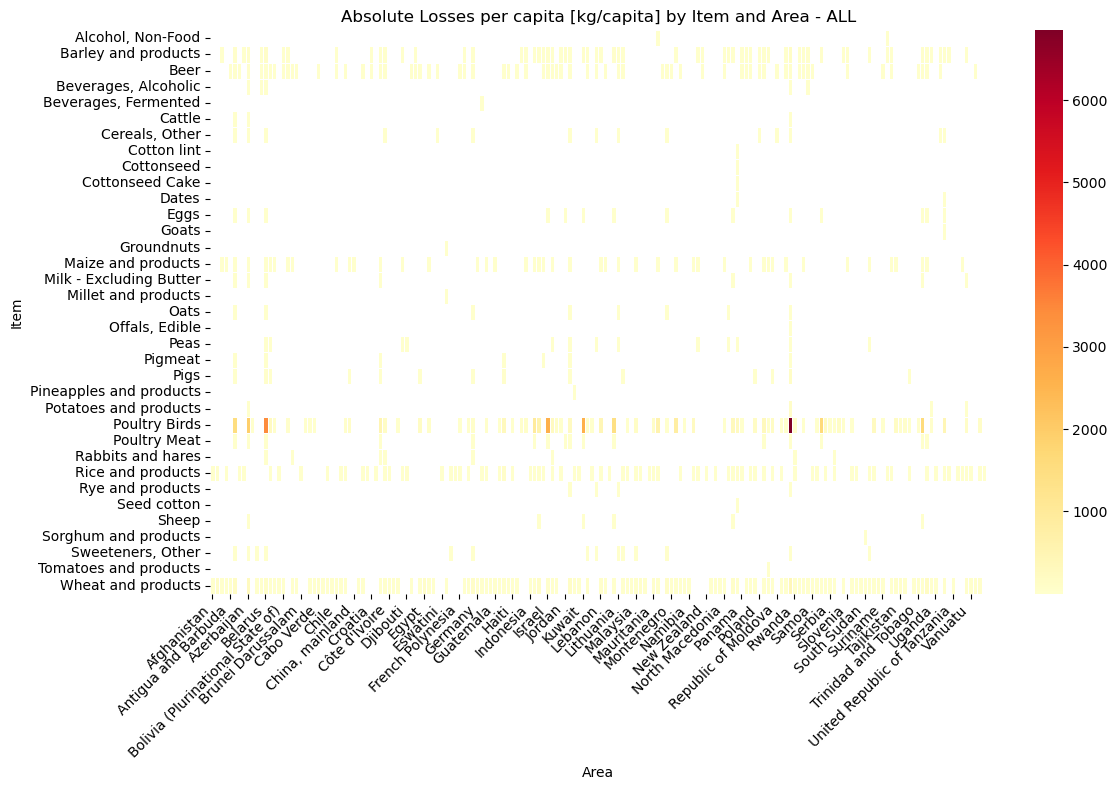

In [58]:
for i in range (len(scenario)):
    pivot_table = df[i].pivot_table(
    index='item',
    columns='area',
    values='al/capita [kg]',
    aggfunc='sum',
    fill_value=0
    )

    # Replace zeros with NaN
    masked_data = pivot_table.replace(0, np.nan)
    cmap = sns.color_palette("YlOrRd", as_cmap=True)
    cmap.set_bad(color='white')

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
    plt.title("Absolute Losses per capita [kg/capita] by Item and Area - " + scenario[i])
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

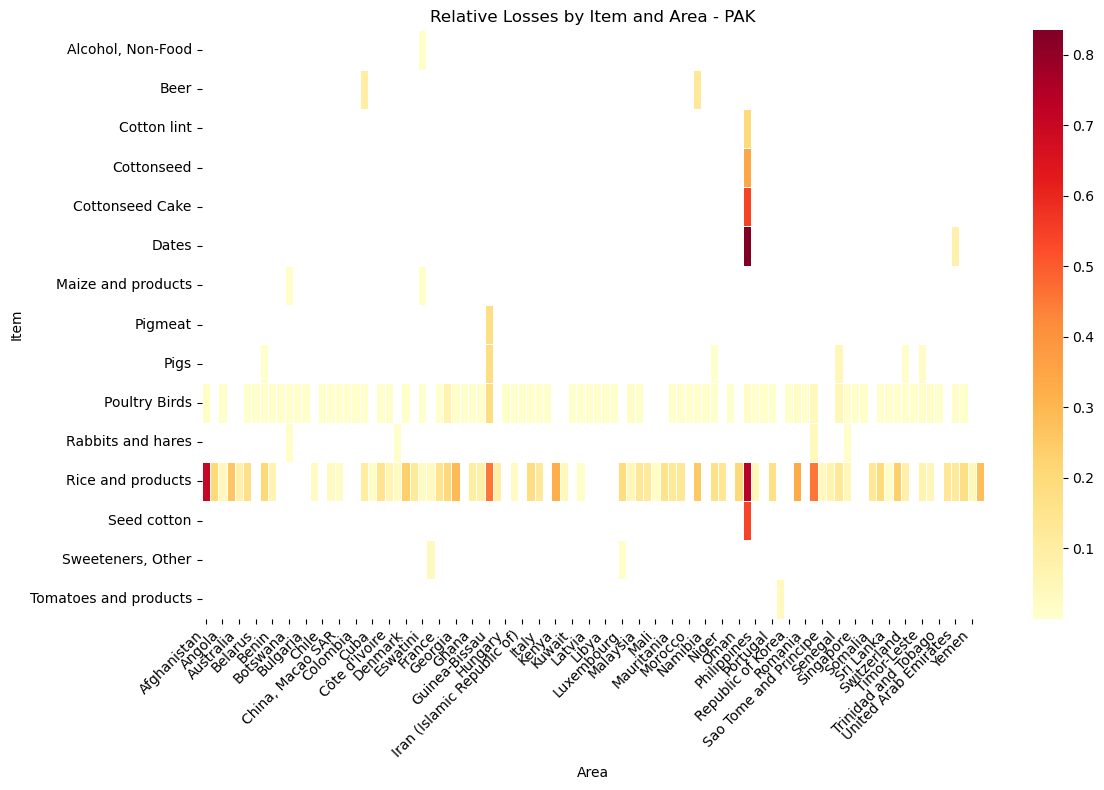

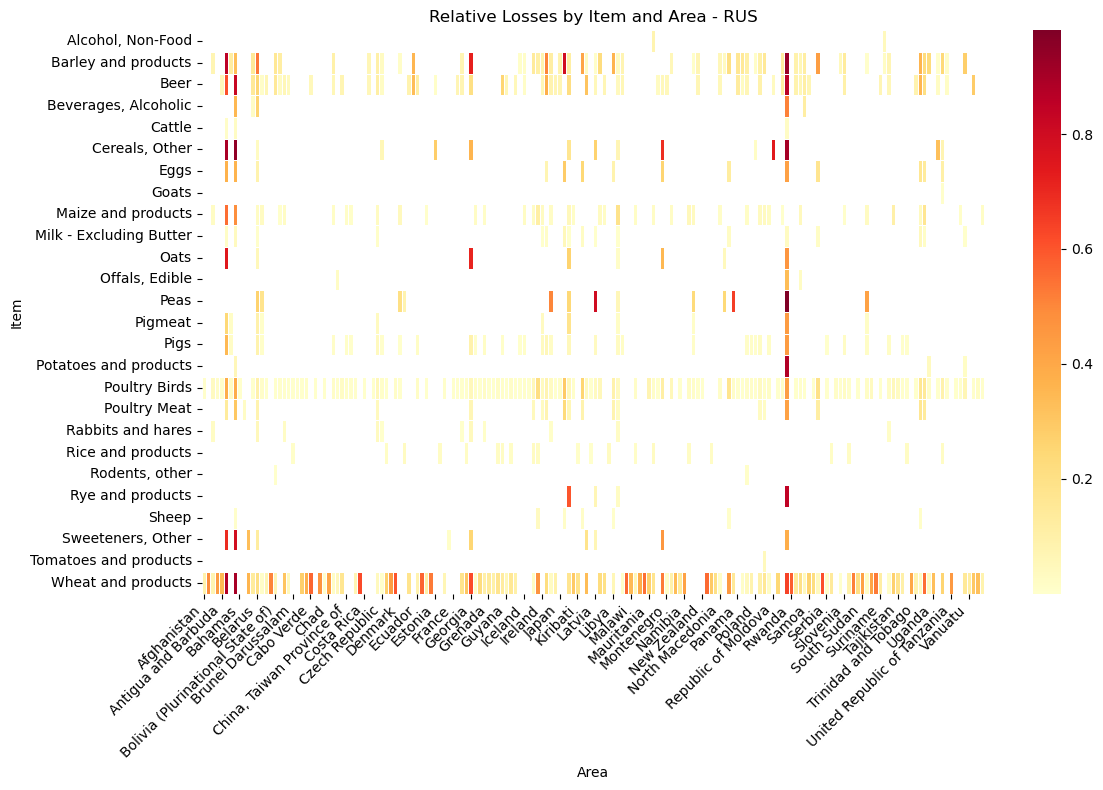

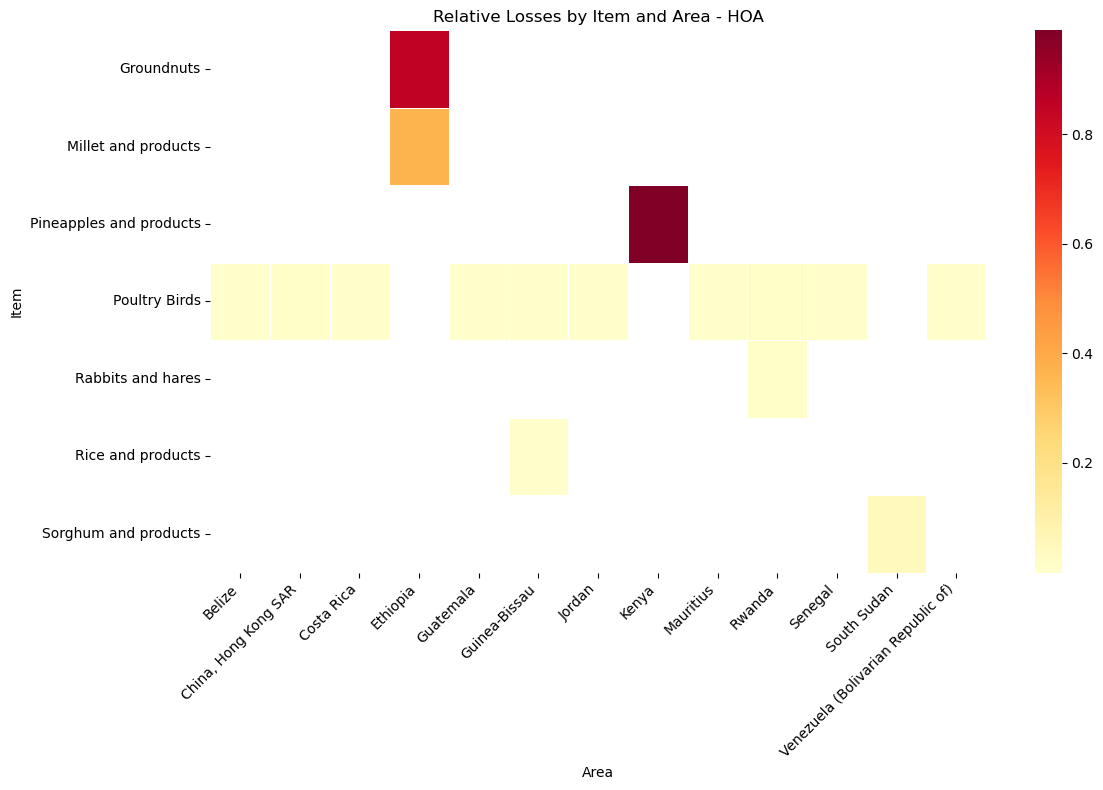

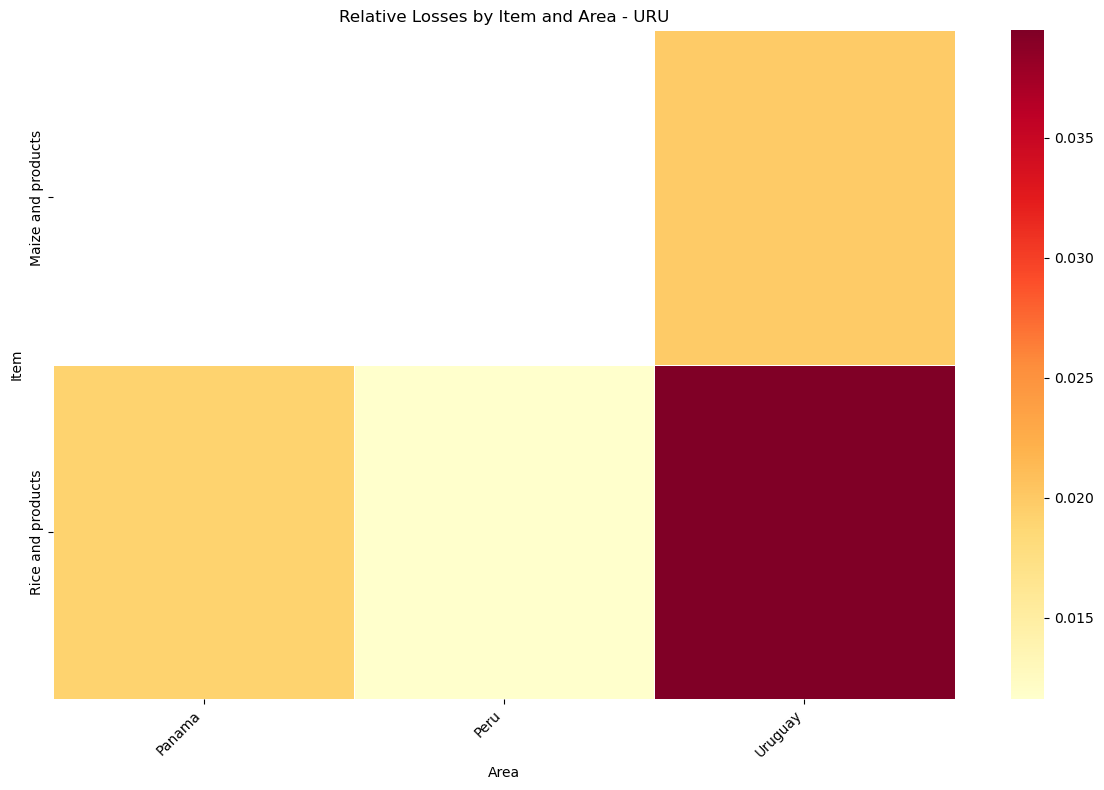

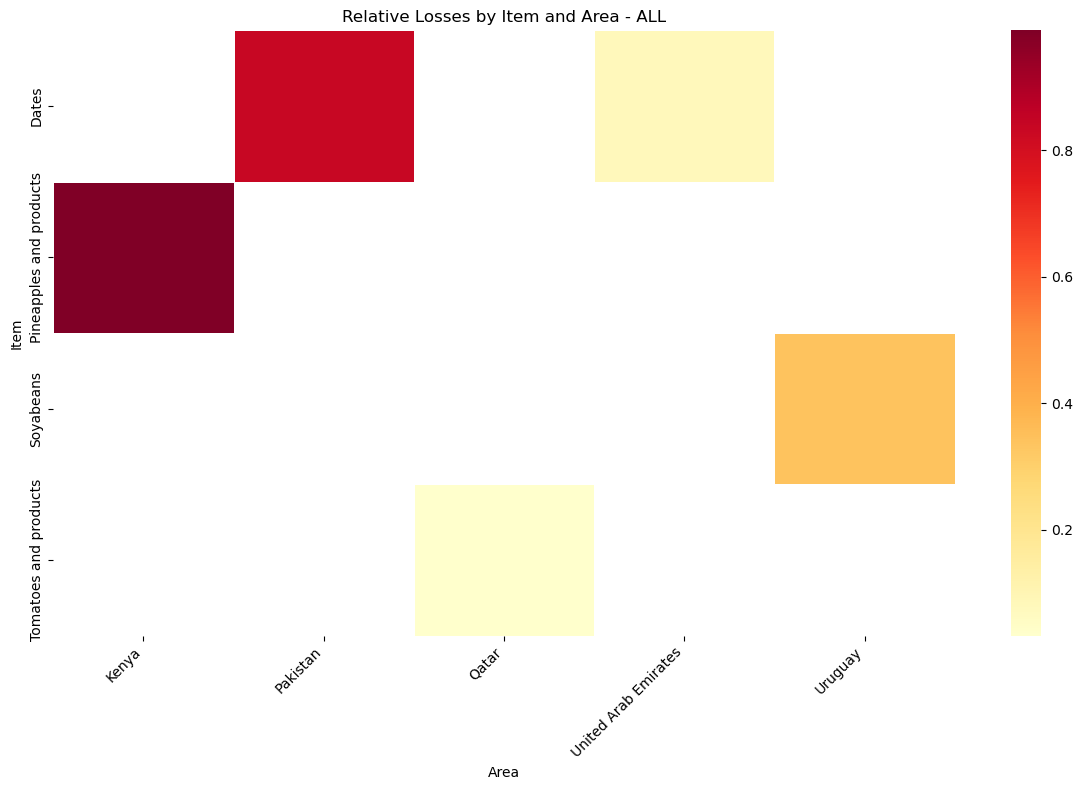

In [48]:
for i in range (len(scenario)):
    pivot_table = df[i].pivot_table(
    index='item',
    columns='area',
    values='relative_losses',
    aggfunc='sum',
    fill_value=0
    )

    # Replace zeros with NaN
    masked_data = pivot_table.replace(0, np.nan)
    cmap = sns.color_palette("YlOrRd", as_cmap=True)
    cmap.set_bad(color='white')

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
    plt.title("Relative Losses by Item and Area - " + scenario[i])
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()